In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv('results.csv')
data

,n,min,max
0,100,11,35
1,100,3,26
2,100,1,34
3,100,4,27
4,100,3,24
...,...,...,...
99995,10000,4,400
99996,10000,7,377
99997,10000,7,456
99998,10000,5,499


In [4]:
summary = data.groupby('n').agg([np.min, np.max, np.mean, np.var, np.std])
summary

min                                  max                             \
      amin amax   mean       var       std amin amax     mean          var   
n                                                                            
100      1   13  3.469  3.590630  1.894896   15   55   29.231    40.716355   
200      1   15  3.607  4.372924  2.091154   19   85   43.254    94.137622   
300      1   12  3.468  3.598575  1.896991   23   97   54.389   147.276956   
400      1   12  3.449  3.448848  1.857107   34  113   64.337   189.256688   
500      1   16  3.498  3.631628  1.905683   33  138   71.501   254.880880   
...    ...  ...    ...       ...       ...  ...  ...      ...          ...   
9600     1   12  3.450  3.581081  1.892374  195  673  340.266  5596.990234   
9700     1   16  3.531  4.137176  2.034005  181  584  338.361  5464.723402   
9800     1   14  3.558  3.760396  1.939174  185  597  342.644  5249.917181   
9900     1   12  3.431  3.716956  1.927941  178  643  340.101  5094.753553   
10000    1   12  3.589  3.609689  1.899918  181  594  350.607  5541.540091   

                  
             std  
n                 
100     6.380937  
200     9.702454  
300    12.135772  
400    13.757060  
500    15.964989  
...          ...  
9600   74.813035  
9700   73.923768  
9800   72.456312  
9900   71.377542  
10000  74.441521  

[100 rows x 10 columns]

In [5]:
min = summary['min']
max = summary['max']

# Nierówność Czebyszewa

Do analizy danych użyjemy nierówności Czebyszewa. Dla przypomnienia - wygląda ona następująco:

$P(|X - E(X)| \geq t) \leq \frac{\mathrm{Var}(X)}{t^2}$.

Przyjmijmy ograniczenie $\frac{\mathrm{Var}(X)}{t^2} = g$ i stąd otrzymujemy $t = \sqrt{\frac{\mathrm{Var}(X)}{g}}$.


In [6]:
def compute_t(data, g):
    return np.sqrt(data['var'] / g)

Dla nierówności Czebyszewa możemy wyliczyć górne oraz dolne ograniczenia:
    
$X_u = E(X) + t$

$X_t = E(X) - t$

In [7]:
def compute_chebyschev_bounds(data, t):
    return data['mean'] + t, data['mean'] -t

In [8]:
def draw_plot(data, t, xu, xl, th_ex=None):
    x = np.linspace(100, 10000, 100)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(x, data['amin'], label='min')
    ax.plot(x, data['amax'], label='max')
    ax.plot(x, data['mean'], label='mean')
    ax.plot(x, xu, label='chebyschev upper')
    ax.plot(x, xl, label='chebyschev lower')
    
    if th_ex != None:
        ax.plot(x, th_ex, label='theoretical Ex')
    
    ax.legend()

# Analiza dla najkrótszych ścieżek (protection number)

In [18]:
t_min = compute_t(min, 0.02)
xu_min, xl_min = compute_chebyschev_bounds(min, t_min)

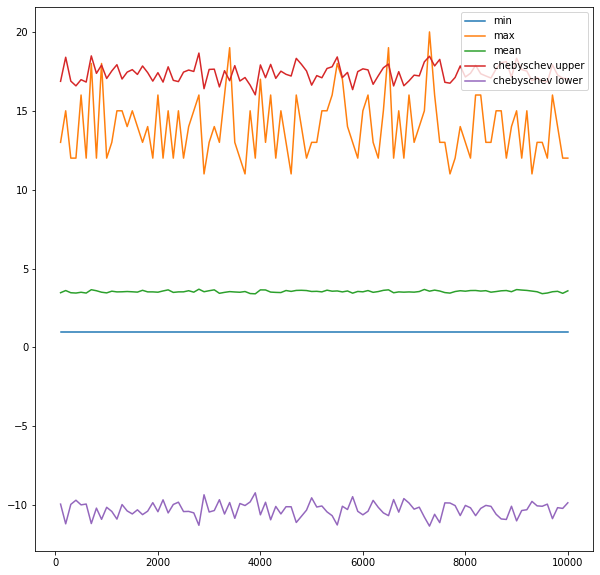

In [19]:
draw_plot(min, t_min, xu_min, xl_min)

In [11]:
data_protection = pd.read_csv('results_protection.csv')
data_protection

,k,v
0,3,224492
1,8,19098
2,18,22
3,20,8
4,19,8
5,25,1
6,6,67540
7,2,212518
8,5,116159
9,11,2427


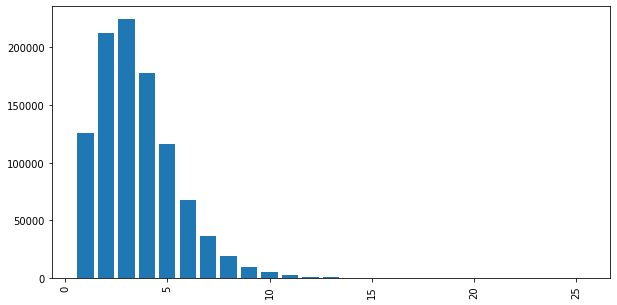

In [12]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(data_protection['k'], data_protection['v'])
plt.show()

# Analiza dla najdłuższych ścieżek

In [20]:
t_max = compute_t(max, 0.03)
xu_max, xl_max = compute_chebyschev_bounds(max, t_max)

In [21]:
th_ex_max = [3.5*math.sqrt(x) for x in range(100, 10001, 100)]

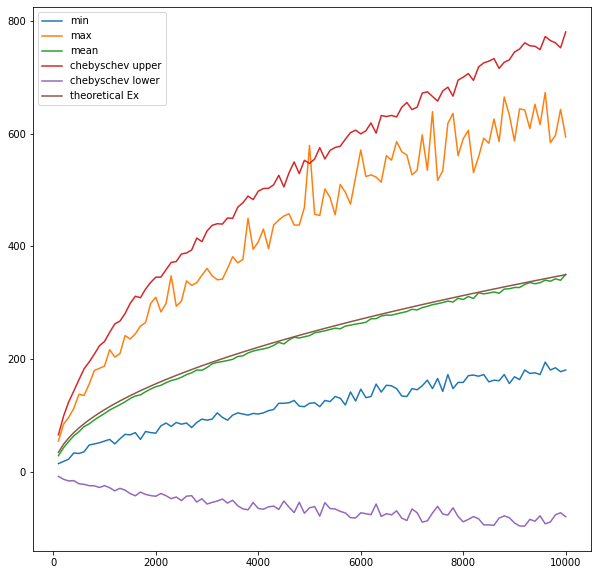

In [22]:
draw_plot(max, t_max, xu_max, xl_max, th_ex_max)

# Rozkład jednostajny

Wybierzmy teraz $n = 4$ i pokażmy dla niego, że drzewa są generowane z rozkładem jednostajnym ($10^7$ powtórzeń)

In [16]:
data_uniform = pd.read_csv('results_uniform.csv')
data_uniform

,k,v
0,11-11-11-1-1,713856
1,1111-1-1-1-1,716108
2,1-11-111-1-1,713451
3,111-11-1-1-1,713979
4,111-1-11-1-1,713458
5,1-111-11-1-1,713627
6,1-111-1-11-1,714270
7,1-1111-1-1-1,713640
8,1-11-11-11-1,714032
9,11-1-11-11-1,714864


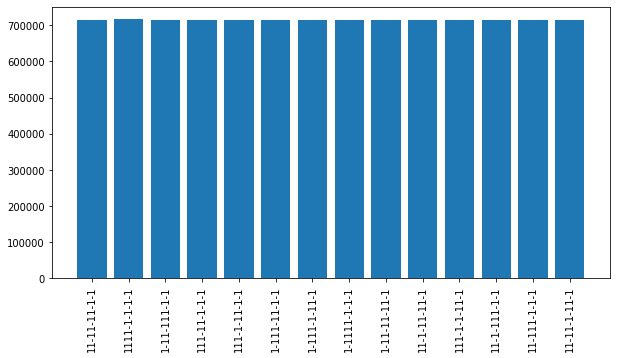

In [17]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(data_uniform['k'], data_uniform['v'])
plt.show()